In [65]:
import xgboost as xgb
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [67]:
import pandas as pd
import os

# Define the directory containing the CSV files
csv_directory = './csv_files/'  # Update this to your directory

# List all CSV files in the directory
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

# Read each CSV file into a DataFrame, add a column for the file name (without .csv extension), and store them in a list
dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_directory, file)
    df = pd.read_csv(file_path)
    file_name_without_ext = os.path.splitext(file)[0]  # Remove the .csv extension
    df['File_Name'] = file_name_without_ext  # Add the file name without extension as a new column
    df['Has_PD'] = "Pt" in file_name_without_ext
    dataframes.append(df)

# Concatenate all DataFrames into one big DataFrame
big_df = pd.concat(dataframes, ignore_index=True)
big_df.dropna()

print(f"Combined DataFrame shape: {big_df.shape}")

EmptyDataError: No columns to parse from file

In [44]:
big_df.head(10)

,Time (seconds),L1,L2,L3,L4,L5,L6,L7,L8,R1,...,R3,R4,R5,R6,R7,R8,Total_L,Total_R,File_Name,Has_PD
0,0.00,199.1,87.34,91.08,24.09,21.12,87.67,87.23,64.57,163.9,...,112.42,50.82,13.75,102.74,144.98,79.53,662.20,748.00,GaCo01_01,False
1,0.01,199.1,87.34,91.08,24.09,21.12,87.67,87.23,64.57,163.9,...,112.42,50.82,13.75,102.74,144.98,79.53,662.20,748.00,GaCo01_01,False
2,0.02,199.1,87.34,91.08,24.09,21.12,87.67,87.23,62.59,163.9,...,112.42,50.82,13.75,102.74,144.98,79.53,660.22,748.00,GaCo01_01,False
3,0.03,199.1,87.34,91.08,24.09,21.12,87.67,89.10,64.57,163.9,...,112.42,48.07,13.75,105.49,144.98,79.53,664.07,745.69,GaCo01_01,False
4,0.04,199.1,87.34,91.08,24.09,21.12,87.67,87.23,62.59,163.9,...,112.42,50.82,13.75,105.49,144.98,79.53,660.22,748.44,GaCo01_01,False
5,0.05,199.1,87.34,91.08,24.09,19.03,87.67,89.10,62.59,163.9,...,112.42,50.82,13.75,102.74,144.98,79.53,660.00,745.69,GaCo01_01,False
6,0.06,199.1,87.34,91.08,24.09,21.12,87.67,89.10,64.57,163.9,...,112.42,48.07,13.75,102.74,142.12,79.53,664.07,740.08,GaCo01_01,False
7,0.07,199.1,87.34,93.50,24.09,19.03,87.67,89.10,64.57,163.9,...,112.42,50.82,13.75,105.49,144.98,79.53,664.40,748.44,GaCo01_01,False
8,0.08,199.1,87.34,93.50,24.09,21.12,87.67,89.10,62.59,163.9,...,112.42,48.07,13.75,102.74,144.98,79.53,664.51,742.94,GaCo01_01,False
9,0.09,199.1,87.34,93.50,24.09,21.12,87.67,89.10,64.57,163.9,...,112.42,50.82,13.75,102.74,142.12,79.53,666.49,742.83,GaCo01_01,False


In [43]:
# Group by the File_Name column and get the maximum time for each file
max_times = big_df.groupby('File_Name')['Time (seconds)'].max()

max_times

File_Name
GaCo01_01    121.1715
GaCo02_01    121.1715
GaCo02_02    121.1715
GaCo03_01    121.1715
GaCo03_02    121.1715
               ...   
SiPt37_01    121.1715
SiPt38_01    121.1715
SiPt39_01    121.1715
SiPt40_01    121.1715
max_times         NaN
Name: Time (seconds), Length: 307, dtype: float64

In [58]:
# defining data and classifier
X = big_df.groupby('File_Name')[['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']].mean()

y = big_df.groupby('File_Name')['Has_PD'].min()

In [59]:
X

,L1,L2,L3,L4,L5,L6,L7,L8,R1,R2,R3,R4,R5,R6,R7,R8
File_Name,,,,,,,,,,,,,,,,
GaCo01_01,118.058628,68.693616,48.429436,43.701796,20.648422,94.384175,93.851130,32.888021,100.972548,61.530028,51.853495,70.040846,16.359639,104.849969,114.501931,43.205802
GaCo02_01,111.435346,84.354379,67.786350,44.369847,5.277513,78.683938,28.448674,20.863085,94.468470,62.608153,59.429399,47.721021,6.489265,90.838570,55.466622,30.944609
GaCo02_02,103.869490,84.819031,62.562062,45.870690,8.006773,71.007410,30.269134,22.707671,87.205593,70.736218,53.449634,55.575124,9.546945,83.667521,56.833975,32.574014
GaCo03_01,87.837728,70.253221,86.639654,90.961822,12.026915,92.895649,109.513627,50.502253,115.006475,82.004333,67.854134,100.660111,28.443010,64.252907,91.193803,41.858998
GaCo03_02,102.235674,79.031265,81.314498,98.209233,13.159191,92.920038,102.002776,47.120373,111.493037,101.131253,54.169894,107.095788,23.473296,78.168011,87.129022,39.748803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SiPt37_01,32.450209,37.924431,38.834566,30.462775,30.054099,48.487626,85.378117,41.487899,28.128186,44.417445,33.489195,59.292669,24.098741,64.900408,53.898094,38.614674
SiPt38_01,32.405388,59.724182,59.503356,58.755312,34.801780,24.375216,43.362383,13.333300,32.071894,67.934862,66.662278,72.220060,25.754232,26.387093,25.227514,14.026067
SiPt39_01,95.925065,103.145264,81.767015,55.550354,49.692334,39.367393,59.635249,16.971451,65.247600,89.823891,61.030022,73.119893,72.100820,44.733094,80.459967,23.285817


In [60]:
y

File_Name
GaCo01_01    False
GaCo02_01    False
GaCo02_02    False
GaCo03_01    False
GaCo03_02    False
             ...  
SiPt37_01     True
SiPt38_01     True
SiPt39_01     True
SiPt40_01     True
max_times    False
Name: Has_PD, Length: 307, dtype: bool

In [61]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8'])
df['Target'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis=1), df['Target'], test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8'])
df['Target'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis=1), df['Target'], test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.87


C:\Users\junxi\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:51:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


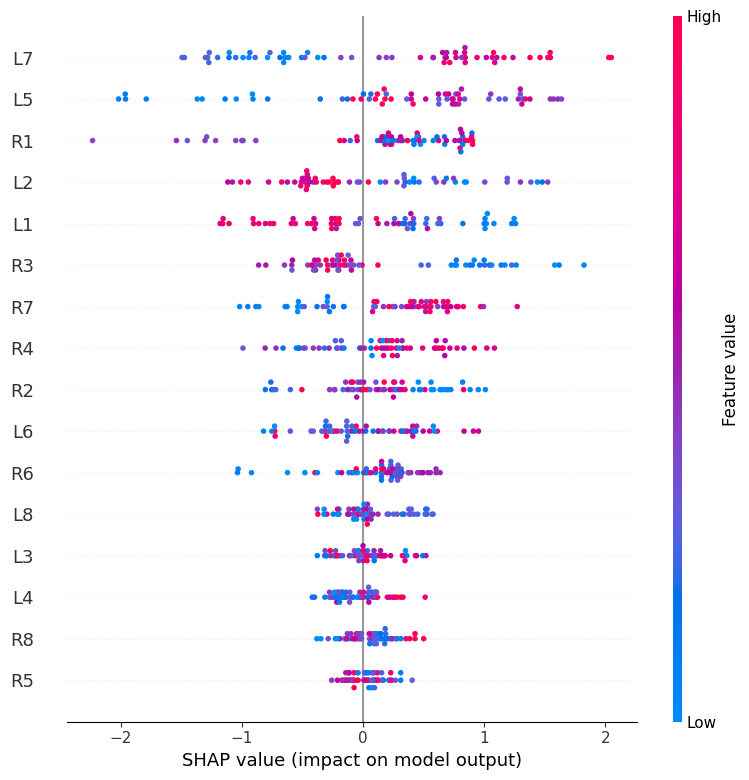

In [63]:
import shap
shap.initjs()
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)